# Blood Glucose Control - EDA

**Name:** [*Safiya Makada*]



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df_patient_500030 = pd.read_csv('../data/gluroo_500030.csv')
df_patient_679372 = pd.read_csv('../data/gluroo_679372.csv')

# Add patient_id column to distinguish between patients
df_patient_500030['patient_id'] = '500030'
df_patient_679372['patient_id'] = '679372'

# Concatenate the two dataframes
df = pd.concat([df_patient_500030, df_patient_679372], ignore_index=True)

### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

This data visualization is meant to show PWD how long it takes for insulin to resolve their highs. This can help them determine why certain highs take longer than others, which can have to do with lifestyle as well as potential insulin resistance.

In the resulting graph, it shows that it usually only takes a matter of minutes for insulin to resolve their highs. However, there is an outlier that should be considered with their physician.

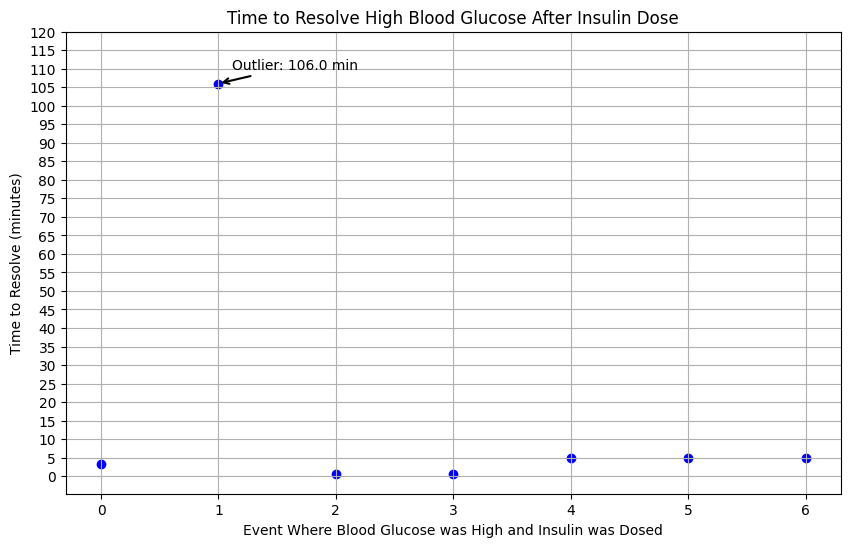

In [2]:
# Define high and normal blood glucose thresholds based on clinical guidelines
high_threshold = 250  # mg/dL
normal_threshold = 130  # mg/dL

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'], utc=True, format='mixed')

# Filter for rows where blood glucose was high
high_bgl_df = df[df['bgl'] > high_threshold]

# Filter for rows where insulin was dosed and blood glucose was high
dose_df = df[(df['dose_units'] > 0) & (df['bgl'] > high_threshold)]

# Initialize a list to store the time to resolution
time_to_resolve = []

# Iterate over each dose and calculate time to resolution
for i, dose_row in dose_df.iterrows():
    # Find the first row after the dose where blood glucose is below the normal threshold
    post_dose_bgl_df = df[(df['date'] > dose_row['date'])
                          & (df['bgl'] < normal_threshold)]

    if not post_dose_bgl_df.empty:
        # Get the first time the glucose level resolves
        first_resolved = post_dose_bgl_df.iloc[0]

        # Calculate the time difference between the dose and resolution
        time_diff = first_resolved['date'] - dose_row['date']
        # Convert to minutes
        time_to_resolve.append(time_diff.total_seconds() / 60)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(time_to_resolve)), time_to_resolve, color='blue')
# Add annotation for the outlier
for i, time in enumerate(time_to_resolve):
    if time > 50:  # Adjust this threshold to identify outliers
        plt.annotate(f'Outlier: {time:.1f} min', (i, time), xytext=(
            10, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->", lw=1.5))
plt.yticks(np.arange(0, 121, 5))
plt.title('Time to Resolve High Blood Glucose After Insulin Dose')
plt.xlabel('Event Where Blood Glucose was High and Insulin was Dosed')
plt.ylabel('Time to Resolve (minutes)')
plt.grid(True)
plt.show()

The purpose of this plot is to show the difference in cgm and finger prick levels. Finger prick is more accurate than the CGM, and this can be used for future model training to understand the accuracy of the CGM.

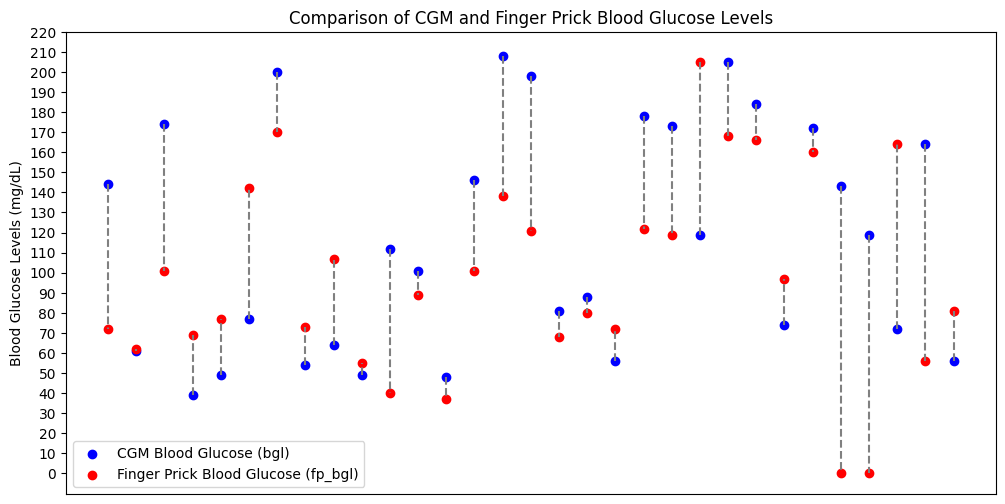

In [3]:
# Filter for rows where both 'bgl' and 'fp_bgl' are present
filtered_df = df[['bgl', 'fp_bgl']].dropna()
# Setting a custom index since date/time is not considered here
filtered_df['custom_index'] = np.arange(1, len(filtered_df) + 1)

plt.figure(figsize=(12, 6))

# Plot both bgl and fp_bgl as scatter points
plt.scatter(filtered_df['custom_index'],
            filtered_df['bgl'], color='blue', label='CGM Blood Glucose (bgl)')
plt.scatter(filtered_df['custom_index'], filtered_df['fp_bgl'],
            color='red', label='Finger Prick Blood Glucose (fp_bgl)')

# Connect each bgl and fp_bgl pair with a line to clearly show the difference
for i in filtered_df['custom_index']:
    plt.plot([i, i], [filtered_df.loc[filtered_df['custom_index'] == i, 'bgl'].values[0],
                      filtered_df.loc[filtered_df['custom_index'] == i, 'fp_bgl'].values[0]],
             color='gray', linestyle='--')

# Add labels and title
plt.ylabel('Blood Glucose Levels (mg/dL)')
plt.title('Comparison of CGM and Finger Prick Blood Glucose Levels')
plt.yticks(np.arange(0, 221, 10))
plt.xticks([])
# Add legend
plt.legend()

# Display the plot
plt.show()

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. How common is insulin resistance? At what age do people start developing it?
2. What does the future look like for a permanent solution to T1D? Ex. Artificial pancreas, etc.

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`